<a href="https://colab.research.google.com/github/RAHUL-REDDY-A/ML/blob/main/ml_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [14]:
def load_and_prepare_data(filepath: str, sheet_name: str):
    """
    Loads the purchase data and prepares matrices A and C.

    Parameters:
        filepath (str): Full path to the Excel file
        sheet_name (str): Sheet name containing the data

    Returns:
        A (np.ndarray): Matrix of features (candies, mangoes, milk)
        C (np.ndarray): Matrix of outputs (payment)
    """
    # Load the Excel file and extract necessary columns, removing rows with missing values
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df_cleaned = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()

    # Create feature matrix A and target matrix C
    A = df_cleaned[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    C = df_cleaned[['Payment (Rs)']].values

    return A, C

def analyze_matrix(A: np.ndarray, C: np.ndarray):
    """
    Performs matrix analysis: dimensionality, number of vectors, rank, and pseudo-inverse solution.

    Parameters:
        A (np.ndarray): Matrix of features
        C (np.ndarray): Target matrix

    Returns:
        tuple: dimensionality, number of vectors, rank, and X (cost vector)
    """
    # Get dimensionality (number of features) from A
    dimensionality = A.shape[1]

    # Get number of vectors (number of observations)
    num_vectors = A.shape[0]

    # Calculate rank of A
    rank = np.linalg.matrix_rank(A)

    # Solve AX = C using pseudo-inverse
    A_pinv = np.linalg.pinv(A)
    X = A_pinv @ C

    return dimensionality, num_vectors, rank, X

# === MAIN PROGRAM ===

# Absolute file path to your Excel file
file_path = r"/content/Lab Session Data.xlsx"
sheet = "Purchase data"

# Step 1: Load and prepare the matrices
A, C = load_and_prepare_data(file_path, sheet)

# Step 2: Analyze the matrices
dim, n_vectors, rank, X = analyze_matrix(A, C)

# Step 3: Display results (all print statements kept outside the functions as per instructions)
print(f"Dimensionality of Vector Space: {dim}")             # 3 features → Candy, Mango, Milk
print(f"Number of Vectors in the Space: {n_vectors}")       # One per customer
print(f"Rank of Matrix A: {rank}")                          # Shows number of linearly independent rows
print("\nEstimated Cost per Unit (using pseudo-inverse):")
print(f"Candy (Rs/unit): {X[0][0]:.2f}")
print(f"Mango (Rs/kg): {X[1][0]:.2f}")
print(f"Milk (Rs/packet): {X[2][0]:.2f}")


Dimensionality of Vector Space: 3
Number of Vectors in the Space: 10
Rank of Matrix A: 3

Estimated Cost per Unit (using pseudo-inverse):
Candy (Rs/unit): 1.00
Mango (Rs/kg): 55.00
Milk (Rs/packet): 18.00


Accuracy: 50.00%

Classification Report:
              precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


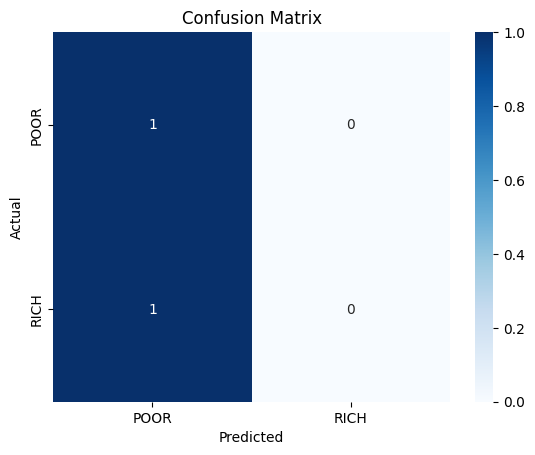

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def load_and_label_data(filepath: str, sheet_name: str):
    """
    Loads and labels purchase data as RICH or POOR based on Payment.
    """
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df_cleaned = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()

    # Label customers based on payment
    df_cleaned['Class'] = df_cleaned['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

    # Features: item quantities
    X = df_cleaned[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values

    # Target: RICH or POOR
    y = df_cleaned['Class'].values

    return X, y

def build_and_train_classifier(X: np.ndarray, y: np.ndarray):
    """
    Splits the data, trains a logistic regression classifier, and evaluates it.
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=False)
    cm = confusion_matrix(y_test, y_pred)

    return acc, report, cm, y_test, y_pred

def plot_confusion_matrix(cm, class_labels):
    """
    Plots a heatmap of the confusion matrix using seaborn.
    """
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# === MAIN PROGRAM ===

# Use absolute path to Excel file
file_path = r"/content/Lab Session Data.xlsx"
sheet = "Purchase data"

# Load data and label classes
X, y = load_and_label_data(file_path, sheet)

# Train and evaluate classifier
accuracy, report, cm, y_true, y_pred = build_and_train_classifier(X, y)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)

# Plot confusion matrix
plot_confusion_matrix(cm, class_labels=['POOR', 'RICH'])


Population Mean (Price): 1560.66
Population Variance (Price): 58732.37
Sample Mean (Wednesdays): 1550.71
Sample Mean (April): 1698.95
Probability of Loss: 49.80%
Probability of Profit on Wednesday: 42.00%
Conditional Probability (Profit | Wednesday): 42.00%


/tmp/ipython-input-16-1752721620.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Day', y='Chg%', data=df, jitter=True, palette='coolwarm')


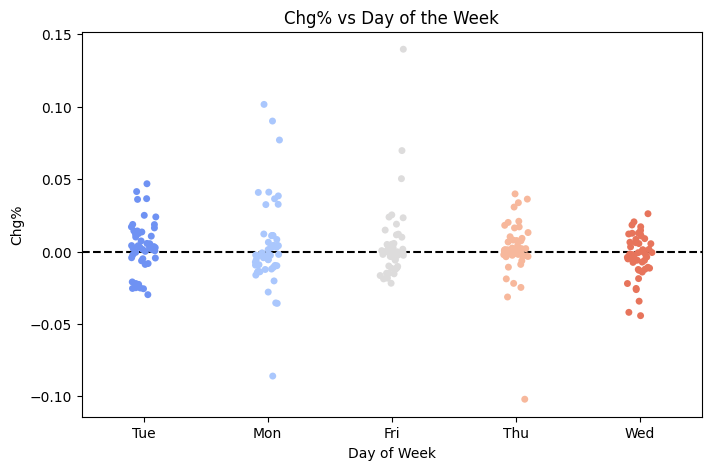

In [16]:
def load_irctc_data(filepath: str, sheet_name: str):
    """
    Loads the IRCTC stock price data from the Excel sheet.
    """
    df = pd.read_excel(filepath, sheet_name=sheet_name)

    # Ensure Chg% is in float for calculations
    df['Chg%'] = df['Chg%'].astype(float)

    return df

def calculate_mean_variance(prices):
    """
    Calculates the mean and variance of the prices.
    """
    prices_float = [float(p) for p in prices]
    mean_price = statistics.mean(prices_float)
    variance_price = statistics.variance(prices_float)
    return mean_price, variance_price

def filter_wednesday_prices(df):
    """
    Filters the price data for all Wednesdays.
    """
    return [float(price) for price, day in zip(df['Price'], df['Day']) if day == 'Wed']

def filter_april_prices(df):
    """
    Filters the price data for the month of April.
    """
    return [float(price) for price, month in zip(df['Price'], df['Month']) if month == 'Apr']

def calculate_loss_probability(df):
    """
    Calculates probability of making a loss from Chg% column.
    """
    chg_values = df['Chg%'].tolist()
    losses = list(filter(lambda x: x < 0, chg_values))
    loss_prob = len(losses) / len(chg_values)
    return loss_prob

def calculate_profit_probability_on_wednesday(df):
    """
    Calculates probability of making a profit on a Wednesday.
    """
    df_wed = df[df['Day'] == 'Wed']
    profit_days = df_wed[df_wed['Chg%'] > 0]
    return len(profit_days) / len(df_wed) if len(df_wed) > 0 else 0

def calculate_conditional_probability_profit_given_wednesday(df):
    """
    Calculates conditional probability of profit given it's Wednesday.
    """
    total_wednesdays = df[df['Day'] == 'Wed']
    wednesday_profits = total_wednesdays[total_wednesdays['Chg%'] > 0]
    prob = len(wednesday_profits) / len(total_wednesdays) if len(total_wednesdays) > 0 else 0
    return prob

def plot_chg_percent_vs_day(df):
    """
    Creates a scatter plot of Chg% vs Day of the Week.
    """
    plt.figure(figsize=(8, 5))
    sns.stripplot(x='Day', y='Chg%', data=df, jitter=True, palette='coolwarm')
    plt.title("Chg% vs Day of the Week")
    plt.xlabel("Day of Week")
    plt.ylabel("Chg%")
    plt.axhline(0, color='black', linestyle='--')
    plt.show()

# === MAIN PROGRAM ===

file_path = r"/content/Lab Session Data.xlsx"
sheet = "IRCTC Stock Price"

# Load data
df_irctc = load_irctc_data(file_path, sheet)

# Mean & Variance
all_prices = df_irctc['Price']
pop_mean, pop_variance = calculate_mean_variance(all_prices)

# Wednesdays & April prices
wednesday_prices = filter_wednesday_prices(df_irctc)
wednesday_mean = statistics.mean(wednesday_prices)
april_prices = filter_april_prices(df_irctc)
april_mean = statistics.mean(april_prices)

# Probability of loss
loss_probability = calculate_loss_probability(df_irctc)

# Probability of profit on Wednesday
profit_on_wed = calculate_profit_probability_on_wednesday(df_irctc)

# Conditional probability of profit given it's Wednesday
cond_prob_profit_given_wed = calculate_conditional_probability_profit_given_wednesday(df_irctc)

# Output all results
print(f"Population Mean (Price): {pop_mean:.2f}")
print(f"Population Variance (Price): {pop_variance:.2f}")
print(f"Sample Mean (Wednesdays): {wednesday_mean:.2f}")
print(f"Sample Mean (April): {april_mean:.2f}")
print(f"Probability of Loss: {loss_probability:.2%}")
print(f"Probability of Profit on Wednesday: {profit_on_wed:.2%}")
print(f"Conditional Probability (Profit | Wednesday): {cond_prob_profit_given_wed:.2%}")

# Plot Chg% vs Day
plot_chg_percent_vs_day(df_irctc)

In [17]:
def load_thyroid_data(filepath: str, sheet_name: str):
    """
    Loads the thyroid dataset from the Excel sheet.
    """
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    return df

def identify_data_types(df: pd.DataFrame):
    """
    Identifies the datatype (nominal, numeric, etc.) for each attribute.
    """
    data_types = {}
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        sample_val = unique_vals[0] if len(unique_vals) > 0 else None
        if pd.api.types.is_numeric_dtype(df[col]):
            data_types[col] = 'Numeric'
        elif df[col].nunique() < 10:
            data_types[col] = 'Categorical (Nominal)'  # low unique values
        else:
            data_types[col] = 'Nominal'
    return data_types

def suggest_encoding(data_types: dict):
    """
    Suggests encoding scheme for categorical attributes.
    """
    encoding = {}
    for col, dtype in data_types.items():
        if "Categorical" in dtype or "Nominal" in dtype:
            encoding[col] = 'One-Hot Encoding'
        elif "Ordinal" in dtype:
            encoding[col] = 'Label Encoding'
        else:
            encoding[col] = 'No Encoding Needed'
    return encoding

def analyze_numeric_ranges(df: pd.DataFrame):
    """
    Returns range (min, max) for numeric attributes.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    ranges = {}
    for col in numeric_cols:
        ranges[col] = (df[col].min(), df[col].max())
    return ranges

def check_missing_values(df: pd.DataFrame):
    """
    Returns count of missing values per attribute.
    """
    return df.isnull().sum()

def detect_outliers_iqr(df: pd.DataFrame):
    """
    Detects outliers in numeric columns using IQR method.
    """
    outliers = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    return outliers

def numeric_stats(df: pd.DataFrame):
    """
    Returns mean and standard deviation of numeric variables.
    """
    stats = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        stats[col] = {
            "Mean": df[col].mean(),
            "Std Dev": df[col].std()
        }
    return stats

# === MAIN PROGRAM ===

file_path = r"/content/Lab Session Data.xlsx"
sheet = "thyroid0387_UCI"

# Step 1: Load the data
df_thyroid = load_thyroid_data(file_path, sheet)

# Step 2: Identify data types
data_types = identify_data_types(df_thyroid)

# Step 3: Suggest encoding schemes
encoding_scheme = suggest_encoding(data_types)

# Step 4: Get range of numeric variables
numeric_ranges = analyze_numeric_ranges(df_thyroid)

# Step 5: Check missing values
missing_values = check_missing_values(df_thyroid)

# Step 6: Detect outliers
outlier_info = detect_outliers_iqr(df_thyroid)

# Step 7: Mean and Std Dev of numeric columns
numeric_statistics = numeric_stats(df_thyroid)

# Display all results
print("Data Types:")
print(data_types)

print("\nEncoding Suggestions:")
print(encoding_scheme)

print("\nNumeric Ranges:")
print(numeric_ranges)

print("\nMissing Values:")
print(missing_values)

print("\nOutliers Detected:")
print(outlier_info)

print("\nMean & Standard Deviation of Numeric Variables:")
print(numeric_statistics)


Data Types:
{'Record ID': 'Numeric', 'age': 'Numeric', 'sex': 'Categorical (Nominal)', 'on thyroxine': 'Categorical (Nominal)', 'query on thyroxine': 'Categorical (Nominal)', 'on antithyroid medication': 'Categorical (Nominal)', 'sick': 'Categorical (Nominal)', 'pregnant': 'Categorical (Nominal)', 'thyroid surgery': 'Categorical (Nominal)', 'I131 treatment': 'Categorical (Nominal)', 'query hypothyroid': 'Categorical (Nominal)', 'query hyperthyroid': 'Categorical (Nominal)', 'lithium': 'Categorical (Nominal)', 'goitre': 'Categorical (Nominal)', 'tumor': 'Categorical (Nominal)', 'hypopituitary': 'Categorical (Nominal)', 'psych': 'Categorical (Nominal)', 'TSH measured': 'Categorical (Nominal)', 'TSH': 'Nominal', 'T3 measured': 'Categorical (Nominal)', 'T3': 'Nominal', 'TT4 measured': 'Categorical (Nominal)', 'TT4': 'Nominal', 'T4U measured': 'Categorical (Nominal)', 'T4U': 'Nominal', 'FTI measured': 'Categorical (Nominal)', 'FTI': 'Nominal', 'TBG measured': 'Categorical (Nominal)', 'TBG':

In [18]:
def load_thyroid_data(filepath: str, sheet_name: str):
    """
    Loads the thyroid dataset.
    """
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    return df

def extract_binary_attributes(df: pd.DataFrame):
    """
    Selects columns with only binary values: 't'/'f', 'yes'/'no', 1/0
    """
    binary_cols = []
    for col in df.columns:
        unique_vals = set(df[col].dropna().unique())
        # Binary if only 2 unique values and they are clearly binary
        if unique_vals <= {'t', 'f'} or unique_vals <= {1, 0}:
            binary_cols.append(col)
    return df[binary_cols]

def encode_binary(df: pd.DataFrame):
    """
    Converts 't'/'f' to 1/0
    """
    df_encoded = df.copy()
    df_encoded.replace({'t': 1, 'f': 0}, inplace=True)
    return df_encoded

def calculate_similarity(vec1, vec2):
    """
    Computes JC and SMC for two binary vectors.
    """
    f11 = sum((vec1 == 1) & (vec2 == 1))
    f00 = sum((vec1 == 0) & (vec2 == 0))
    f10 = sum((vec1 == 1) & (vec2 == 0))
    f01 = sum((vec1 == 0) & (vec2 == 1))

    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
    smc = (f11 + f00) / (f11 + f10 + f01 + f00) if (f11 + f10 + f01 + f00) != 0 else 0

    return {
        'f11': f11,
        'f10': f10,
        'f01': f01,
        'f00': f00,
        'Jaccard Coefficient': jc,
        'Simple Matching Coefficient': smc
    }

# === MAIN PROGRAM ===

file_path = r"/content/Lab Session Data.xlsx"
sheet = "thyroid0387_UCI"

# Step 1: Load data
df_thyroid = load_thyroid_data(file_path, sheet)

# Step 2: Filter binary columns
df_binary = extract_binary_attributes(df_thyroid)

# Step 3: Encode binary (t/f → 1/0)
df_encoded = encode_binary(df_binary)

# Step 4: Take first two vectors (rows)
vec1 = df_encoded.iloc[0].values
vec2 = df_encoded.iloc[1].values

# Step 5: Calculate JC and SMC
similarity = calculate_similarity(vec1, vec2)

# Display Results
print("Similarity Metrics between Vector 1 and Vector 2 (Binary Only):")
print(f"f11: {similarity['f11']}")
print(f"f10: {similarity['f10']}")
print(f"f01: {similarity['f01']}")
print(f"f00: {similarity['f00']}")
print(f"Jaccard Coefficient: {similarity['Jaccard Coefficient']:.3f}")
print(f"Simple Matching Coefficient: {similarity['Simple Matching Coefficient']:.3f}")


Similarity Metrics between Vector 1 and Vector 2 (Binary Only):
f11: 1
f10: 1
f01: 2
f00: 16
Jaccard Coefficient: 0.250
Simple Matching Coefficient: 0.850


/tmp/ipython-input-18-3233192493.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({'t': 1, 'f': 0}, inplace=True)


In [19]:
from sklearn.preprocessing import LabelEncoder

def load_thyroid_data(filepath: str, sheet_name: str):
    """
    Loads thyroid data.
    """
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    return df

def preprocess_data(df: pd.DataFrame):
    """
    Encodes all columns (binary, nominal) to numeric using Label Encoding (safe for cosine similarity).
    """
    df_encoded = df.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    return df_encoded

def cosine_similarity(a: np.ndarray, b: np.ndarray):
    """
    Computes cosine similarity manually using the formula.
    """
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    if norm_a == 0 or norm_b == 0:
        return 0
    return dot_product / (norm_a * norm_b)

# === MAIN PROGRAM ===

file_path = r"/content/Lab Session Data.xlsx"
sheet = "thyroid0387_UCI"

# Step 1: Load and encode full dataset
df_thyroid = load_thyroid_data(file_path, sheet)
df_encoded = preprocess_data(df_thyroid)

# Step 2: Take first two vectors (rows)
vec1 = df_encoded.iloc[0].values
vec2 = df_encoded.iloc[1].values

# Step 3: Compute cosine similarity
cos_sim = cosine_similarity(vec1, vec2)

# Output result
print(f"Cosine Similarity between first two observations: {cos_sim:.4f}")


Cosine Similarity between first two observations: 1.0000


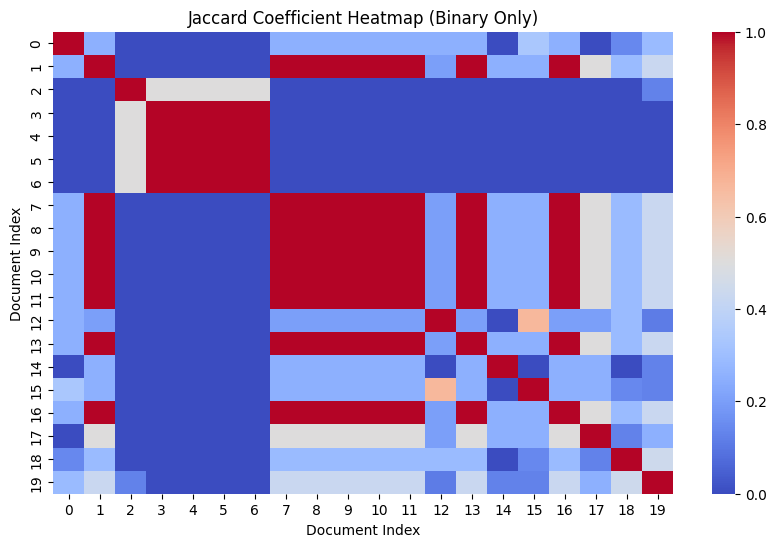

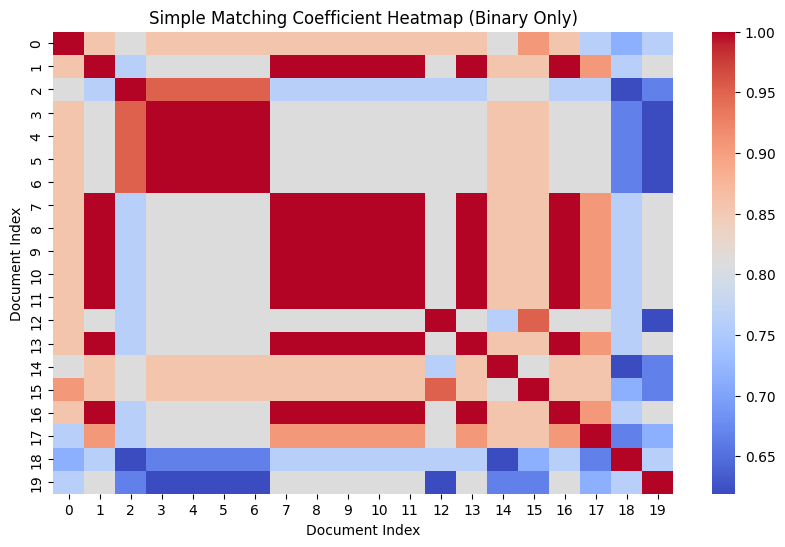

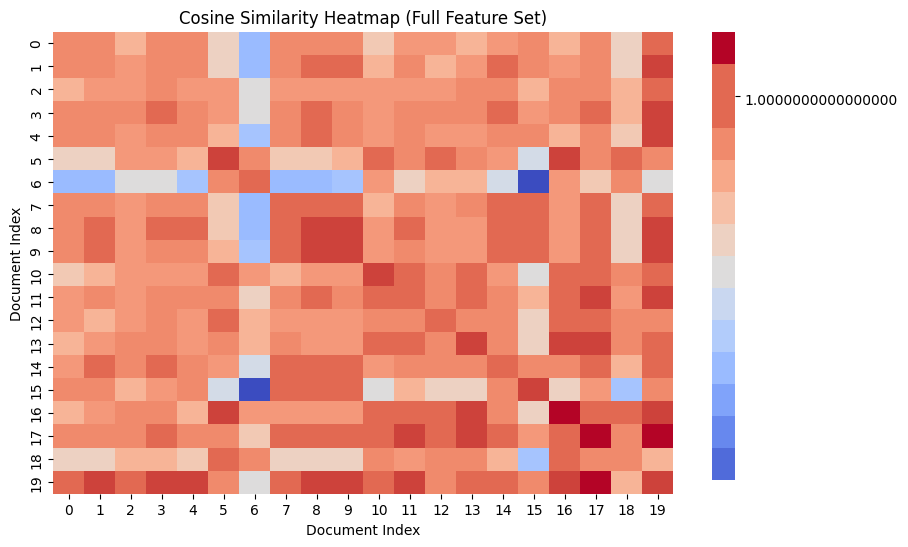

In [20]:
from sklearn.preprocessing import LabelEncoder

def load_thyroid_data(filepath: str, sheet_name: str):
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    return df.iloc[:20]  # Take first 20 rows

def encode_all_features(df: pd.DataFrame):
    df_encoded = df.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = df_encoded[col].astype(str)
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])
    return df_encoded

def get_binary_only(df: pd.DataFrame):
    """
    Return only the columns that contain binary values (0/1 or t/f encoded).
    """
    binary_df = df.copy()
    for col in df.columns:
        unique_vals = set(df[col].dropna().unique())
        if not (unique_vals <= {0, 1}):
            binary_df.drop(columns=col, inplace=True)
    return binary_df

def compute_jc_smc(vec1, vec2):
    f11 = np.sum((vec1 == 1) & (vec2 == 1))
    f00 = np.sum((vec1 == 0) & (vec2 == 0))
    f10 = np.sum((vec1 == 1) & (vec2 == 0))
    f01 = np.sum((vec1 == 0) & (vec2 == 1))

    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
    smc = (f11 + f00) / (f11 + f10 + f01 + f00) if (f11 + f10 + f01 + f00) != 0 else 0

    return jc, smc

def cosine_similarity(a, b):
    dot = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot / (norm_a * norm_b) if norm_a != 0 and norm_b != 0 else 0

def compute_similarity_matrices(df_full, df_binary):
    n = len(df_full)
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cos_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            jc, smc = compute_jc_smc(df_binary.iloc[i].values, df_binary.iloc[j].values)
            cos = cosine_similarity(df_full.iloc[i].values, df_full.iloc[j].values)
            jc_matrix[i, j] = jc
            smc_matrix[i, j] = smc
            cos_matrix[i, j] = cos

    return jc_matrix, smc_matrix, cos_matrix

def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=False, cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Document Index")
    plt.ylabel("Document Index")
    plt.show()

# === MAIN PROGRAM ===

file_path = r"/content/Lab Session Data.xlsx"
sheet = "thyroid0387_UCI"

# Step 1: Load and encode data
df_20 = load_thyroid_data(file_path, sheet)
df_encoded = encode_all_features(df_20)
df_binary = get_binary_only(df_encoded)

# Step 2: Compute similarity matrices
jc_matrix, smc_matrix, cos_matrix = compute_similarity_matrices(df_encoded, df_binary)

# Step 3: Plot heatmaps
plot_heatmap(jc_matrix, "Jaccard Coefficient Heatmap (Binary Only)")
plot_heatmap(smc_matrix, "Simple Matching Coefficient Heatmap (Binary Only)")
plot_heatmap(cos_matrix, "Cosine Similarity Heatmap (Full Feature Set)")


In [21]:
def load_thyroid_data(filepath: str, sheet_name: str):
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    return df

def has_outliers(series: pd.Series):
    """
    Detects if a numeric series has outliers using IQR.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).any()

def impute_data(df: pd.DataFrame):
    """
    Imputes missing values using appropriate central tendencies.
    """
    df_imputed = df.copy()

    for col in df.columns:
        if df[col].isnull().sum() == 0:
            continue  # Skip columns with no missing values

        if df[col].dtype in [np.float64, np.int64]:  # Numeric column
            if has_outliers(df[col]):
                value = df[col].median()
                strategy = "median"
            else:
                value = df[col].mean()
                strategy = "mean"
        else:  # Categorical or object
            value = df[col].mode()[0]
            strategy = "mode"

        # Impute the missing values
        df_imputed[col].fillna(value, inplace=True)
        print(f"Imputed missing values in '{col}' using {strategy}: {value}")

    return df_imputed

# === MAIN PROGRAM ===

file_path = r"/content/Lab Session Data.xlsx"
sheet = "thyroid0387_UCI"

# Step 1: Load data
df_thyroid = load_thyroid_data(file_path, sheet)

# Step 2: Impute data
df_imputed = impute_data(df_thyroid)

# Step 3: Verify result
print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())



Missing values after imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def load_thyroid_data(filepath: str, sheet_name: str):
    return pd.read_excel(filepath, sheet_name=sheet_name)

def identify_numeric_columns(df):
    return df.select_dtypes(include=[np.number]).columns.tolist()

def has_outliers(series: pd.Series):
    """
    Detects outliers using IQR method.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).any()

def normalize_data(df):
    """
    Applies Min-Max or Z-score normalization based on presence of outliers.
    """
    df_normalized = df.copy()
    numeric_cols = identify_numeric_columns(df)

    for col in numeric_cols:
        col_data = df[[col]].values  # Keep as 2D for scaler
        if has_outliers(df[col]):
            scaler = StandardScaler()
            method = "Z-score"
        else:
            scaler = MinMaxScaler()
            method = "Min-Max"

        df_normalized[col] = scaler.fit_transform(col_data)
        print(f"Normalized '{col}' using {method} normalization.")

    return df_normalized

# === MAIN PROGRAM ===

file_path = r"/content/Lab Session Data.xlsx"
sheet = "thyroid0387_UCI"

# Load and clean dataset (you can plug in your imputed df from A8 here instead)
df_raw = load_thyroid_data(file_path, sheet)
df_raw = df_raw.dropna()  # Only for safe demo – replace with imputed df if available

# Apply normalization
df_scaled = normalize_data(df_raw)

# Show a sample of normalized values
print("\nSample of Normalized Data:")
print(df_scaled.head())


Normalized 'Record ID' using Min-Max normalization.
Normalized 'age' using Z-score normalization.

Sample of Normalized Data:
      Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00 -0.037634   F            f                  f   
1  3.410871e-08 -0.037634   F            f                  f   
2  9.891527e-07 -0.027499   F            f                  f   
3  6.934301e-05 -0.031722   F            f                  f   
4  6.937712e-05 -0.035100   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ... 